In [2]:
import pandas as pd
import glob
import csv
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

**Merging all file in one CSV**

In [33]:
interesting_files = glob.glob("/home/tomas/ADA/Notorious_ADA_Projet_2019/WHO_policy_timeline_edited/*.csv") 
df = pd.concat((pd.read_csv(f, header = 0) for f in interesting_files))
df.to_csv("Merged_policy.csv")

/home/tomas/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
merged_policy_df = pd.read_csv("Merged_policy.csv")


**Deleting non useful columns**

In [4]:
merged_policy_df = merged_policy_df.drop(columns=['Data Source', 'Unnamed: 0'])
merged_policy_df.head(10)

,Availability of alcohol,Community and workplace action,Country,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies,Year
0,NaN,NaN,Bulgaria,NaN,NaN,Public funding for an alcohol research project...,NaN,
1,NaN,NaN,Lithuania,NaN,NaN,The Department of Statistics changed the metho...,NaN,2016
2,NaN,NaN,Portugal,NaN,NaN,Publication of “Relatório Anual sobre a Situaç...,NaN,2016
3,NaN,NaN,Russian Federation,NaN,NaN,The requirement to be equipped with technical ...,NaN,2016
4,NaN,NaN,Slovenia,NaN,NaN,Publication of a report on the recorded alcoho...,NaN,2016
5,NaN,NaN,United Kingdom of Great Britain and Northern ...,NaN,NaN,England: Public Health England is commissionin...,NaN,2016
6,NaN,NaN,United Kingdom of Great Britain and Northern ...,NaN,NaN,Scotland: Publication of “Monitoring and Evalu...,NaN,2016
7,NaN,NaN,Hungary,NaN,NaN,National participation in the Joint Action on ...,NaN,2015
8,NaN,NaN,Iceland,NaN,NaN,Regular annual monitoring of determinants of h...,NaN,2015
9,NaN,NaN,Italy,NaN,NaN,Publicaiton of “L’uso e l’abuso di alcol in It...,NaN,2015


In [5]:
merged_policy_df_index = merged_policy_df.set_index(['Year', 'Country'])

**Putting value 0 too all cells with no data**

In [6]:
merged_policy_df_index[merged_policy_df_index.isna()] = 0

In [7]:
merged_policy_df_index

Availability of alcohol  \
Year Country                                                                      
      Bulgaria                                                                0   
2016  Lithuania                                                               0   
      Portugal                                                                0   
      Russian Federation                                                      0   
      Slovenia                                                                0   
...                                                                         ...   
2015  Kazakhstan                                                              0   
      Portugal                                                                0   
      Republic of Moldova                                                     0   
      Turkey                                                                  0   
2013  United Kingdom of Great Britain and Northern I...                       0   

                                                        Community and workplace action  \
Year Country                                                                             
      Bulgaria                                                                       0   
2016  Lithuania                                                                      0   
      Portugal                                                                       0   
      Russian Federation                                                             0   
      Slovenia                                                                       0   
...                                                                                ...   
2015  Kazakhstan                                                                     0   
      Portugal                                                                       0   
      Republic of Moldova                                                            0   
      Turkey                                                                         0   
2013  United Kingdom of Great Britain and Northern I...                              0   

                                                        Leadership, awareness and commitment  \
Year Country                                                                                   
      Bulgaria                                                                             0   
2016  Lithuania                                                                            0   
      Portugal                                                                             0   
      Russian Federation                                                                   0   
      Slovenia                                                                             0   
...                                                                                      ...   
2015  Kazakhstan                                                                           0   
      Portugal                                                                             0   
      Republic of Moldova                                                                  0   
      Turkey                                                                               0   
2013  United Kingdom of Great Britain and Northern I...                                    0   

                                                                          Marketing of alcoholic beverages  \
Year Country                                                                                                 
      Bulgaria                                                                                           0   
2016  Lithuania                                                                                          0   
      Portugal                                                                                           0   
      

**Change string with 1**

In [8]:
merged_policy_df_index['Monitoring and surveillance'][merged_policy_df_index['Monitoring and surveillance'].apply(type) == str] = 1
merged_policy_df_index['Availability of alcohol'][merged_policy_df_index['Availability of alcohol'].apply(type) == str] = 1
merged_policy_df_index['Community and workplace action'][merged_policy_df_index['Community and workplace action'].apply(type) == str] = 1
merged_policy_df_index['Leadership, awareness and commitment'][merged_policy_df_index['Leadership, awareness and commitment'].apply(type) == str] = 1
merged_policy_df_index['Marketing of alcoholic beverages'][merged_policy_df_index['Marketing of alcoholic beverages'].apply(type) == str] = 1
merged_policy_df_index['Pricing policies'][merged_policy_df_index['Pricing policies'].apply(type) == str] = 1


In [28]:
merged_policy_df_index

MultiIndex([(   ' ',                                             ' Bulgaria'),
            ('2016',                                            ' Lithuania'),
            ('2016',                                             ' Portugal'),
            ('2016',                                   ' Russian Federation'),
            ('2016',                                             ' Slovenia'),
            ('2016', ' United Kingdom of Great Britain and Northern Ireland'),
            ('2016', ' United Kingdom of Great Britain and Northern Ireland'),
            ('2015',                                              ' Hungary'),
            ('2015',                                              ' Iceland'),
            ('2015',                                                ' Italy'),
            ...
            ('2016',                                                ' India'),
            (   ' ',                                             ' Bulgaria'),
            ('2016',                

In [10]:
merged_policy_df_number = merged_policy_df_index

**Check number of policies by category per year**

In [15]:
policy_by_year = merged_policy_df_number.groupby("Year").sum()

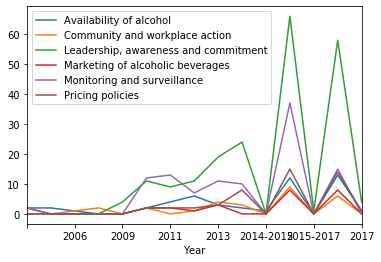

In [12]:
policy_by_year.plot()

**Eliminate 2014-2015 and 2015-2017 as not clear which year they actually took place**

In [33]:
policy_by_year = policy_by_year.drop(['2014-2015', '2015-2017'])

**Eliminate years where not enough data is gathered (before 2012 and 2017)**

In [43]:
policy_by_year_final = policy_by_year.drop(policy_by_year.index[[0,1,2,3,4,5,6,12]])

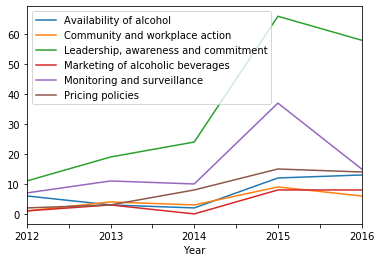

In [44]:
policy_by_year_final.plot()

**check policies by country**

In [105]:
policy_by_country = merged_policy_df_number.groupby("Country").sum()

In [115]:
policy_by_country

,Availability of alcohol,Community and workplace action,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies
Country,,,,,,
Afghanistan,0,1,0,0,0,0
Australia,0,0,0,1,1,0
Austria,0,0,3,0,0,0
Azerbaijan,0,0,1,0,0,0
Bahamas,0,0,1,0,0,0
...,...,...,...,...,...,...
Republic of Korea,0,0,1,0,0,0
Singapore,0,0,1,0,0,0
Solomon Islands,0,0,3,0,0,0


In [141]:
test = policy_by_country.sort_values('Leadership, awareness and commitment', ascending=False)

In [134]:
test

,Availability of alcohol,Community and workplace action,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies
Country,,,,,,
United Kingdom of Great Britain and Northern Ireland,9,15,10,1,3,3
Malaysia,0,2,0,0,3,0
Afghanistan,0,1,0,0,0,0
Kiribati,0,1,0,0,0,0
Vanuatu,1,1,0,0,0,1
...,...,...,...,...,...,...
Lao People's Democratic Republic,0,0,1,0,0,0
United States of America,0,0,1,0,2,0
Poland,0,0,1,0,0,0


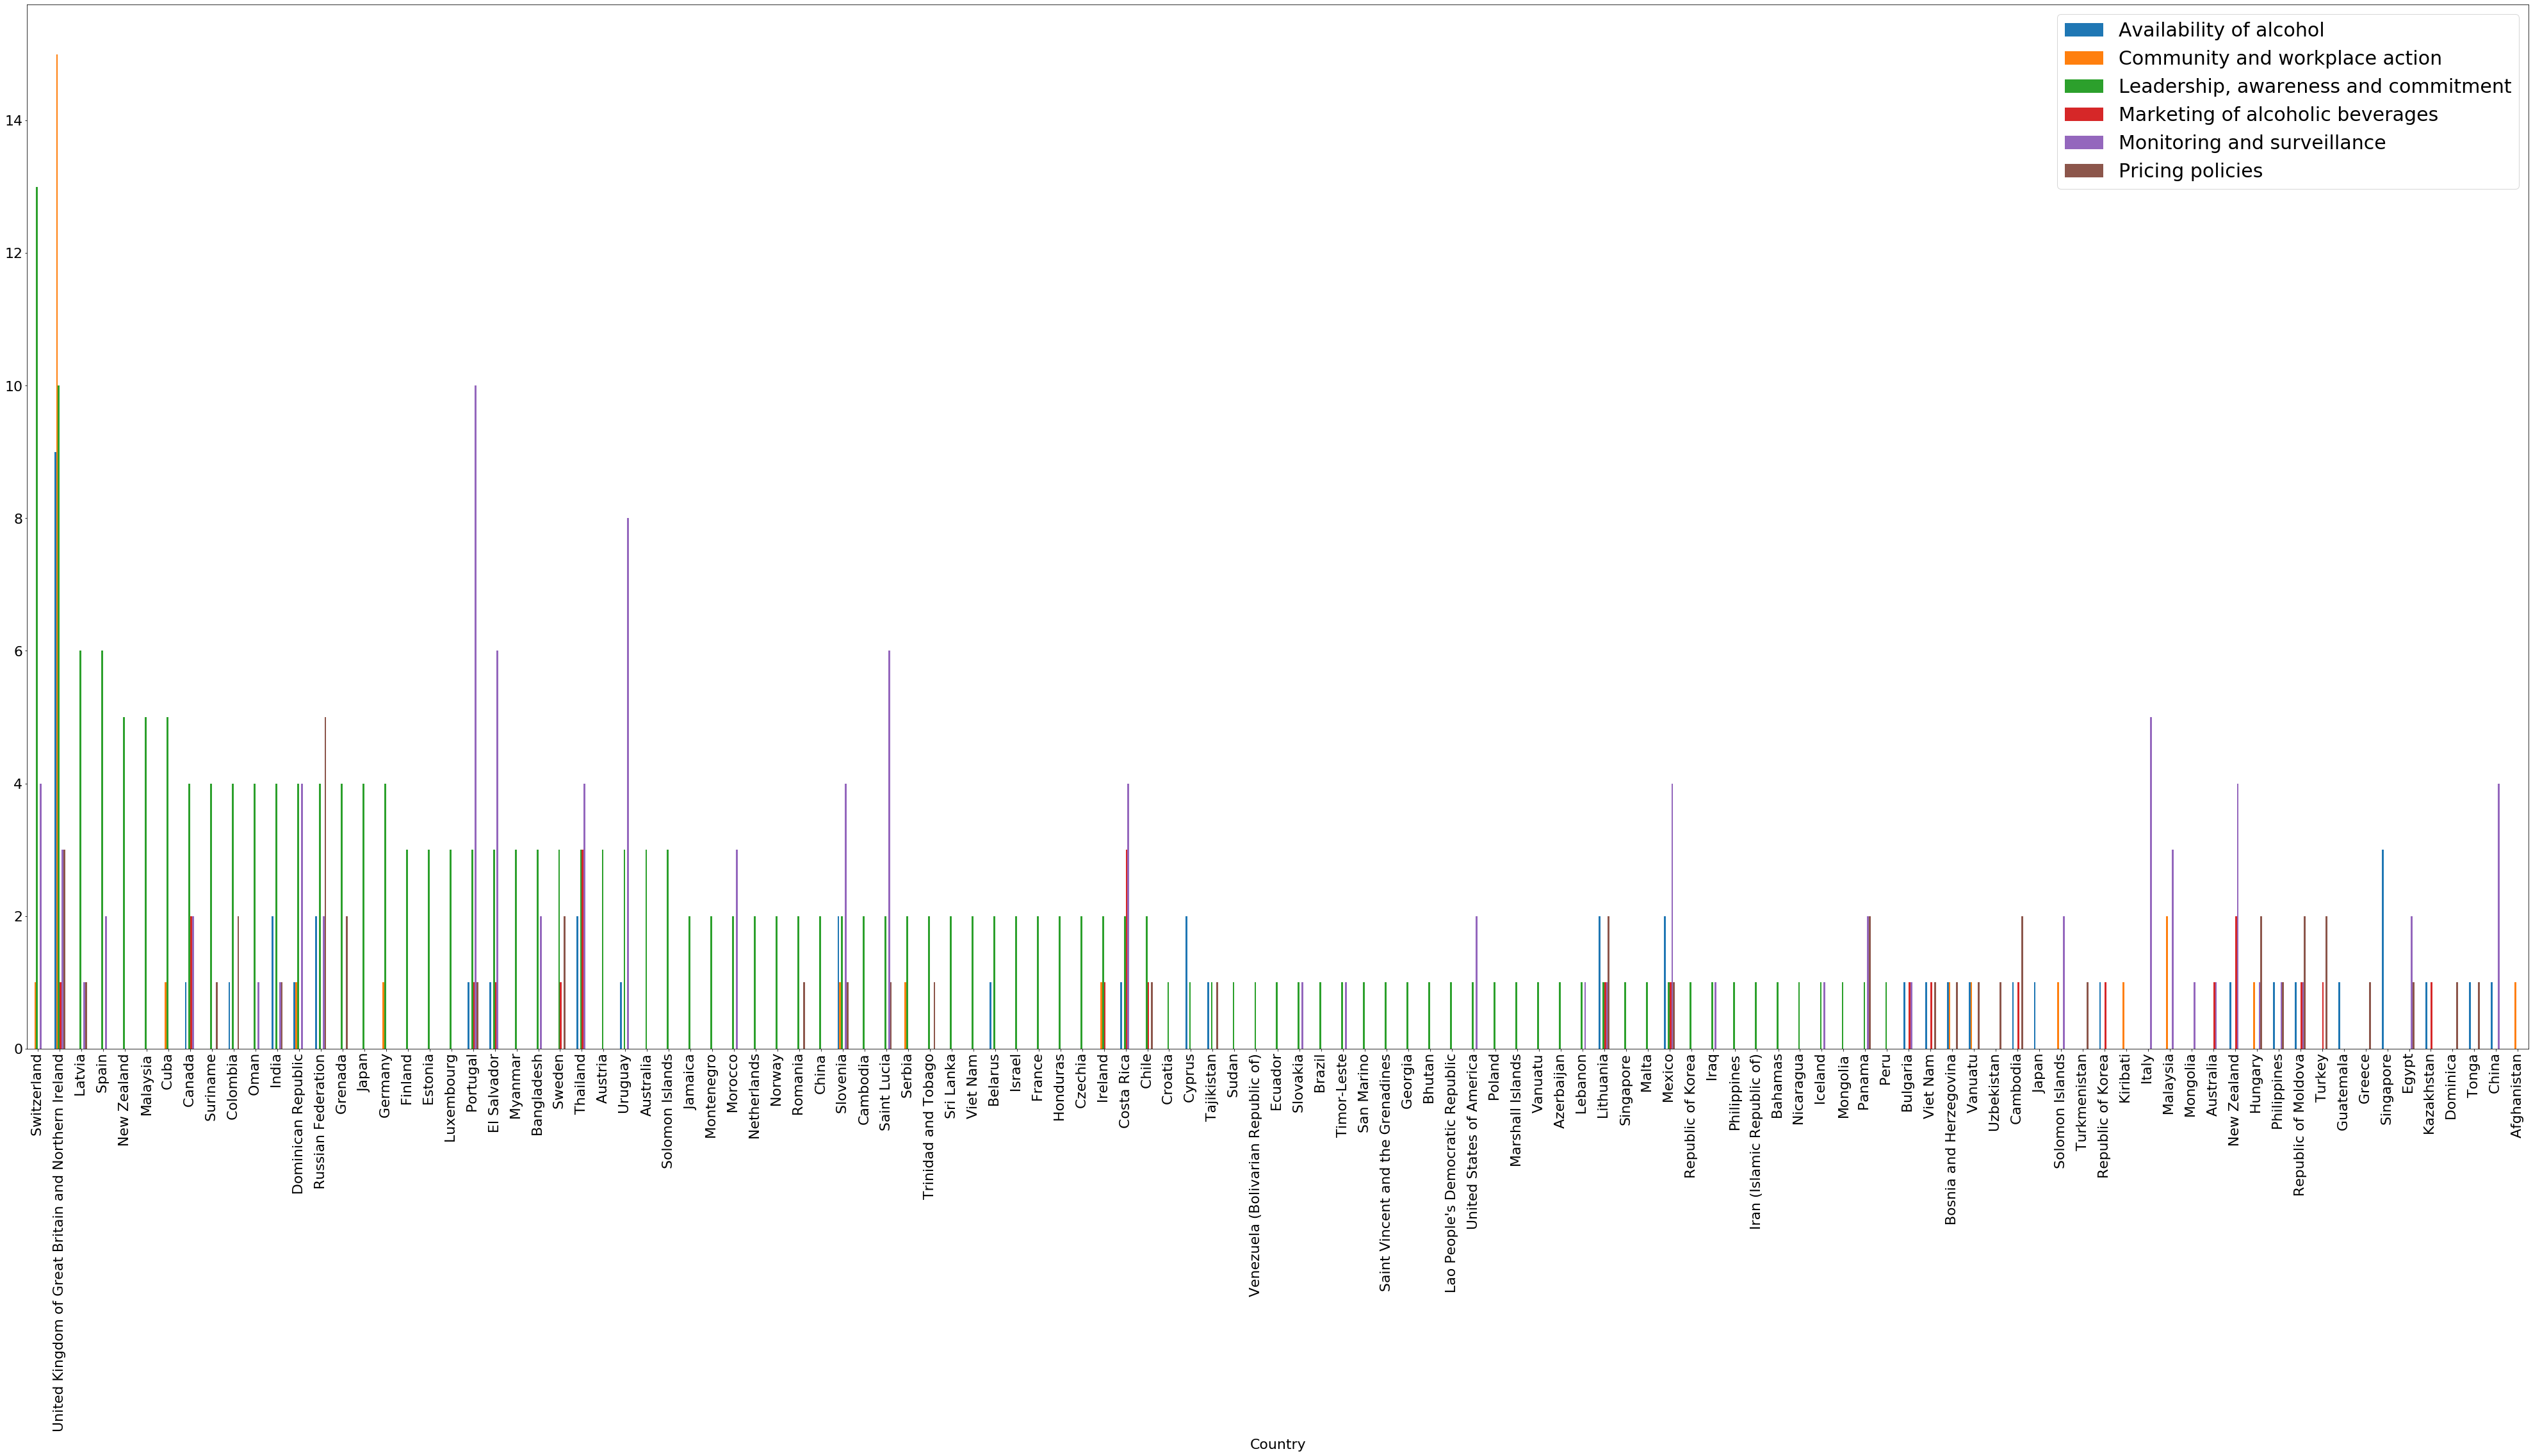

In [150]:
test.plot.bar()
plt.rcParams["figure.figsize"] = [70,30]
plt.legend(loc=1, prop={'size': 30})
plt.rcParams.update({'font.size': 62})

check which policy is most used in which region

See what countries are missing and in which region

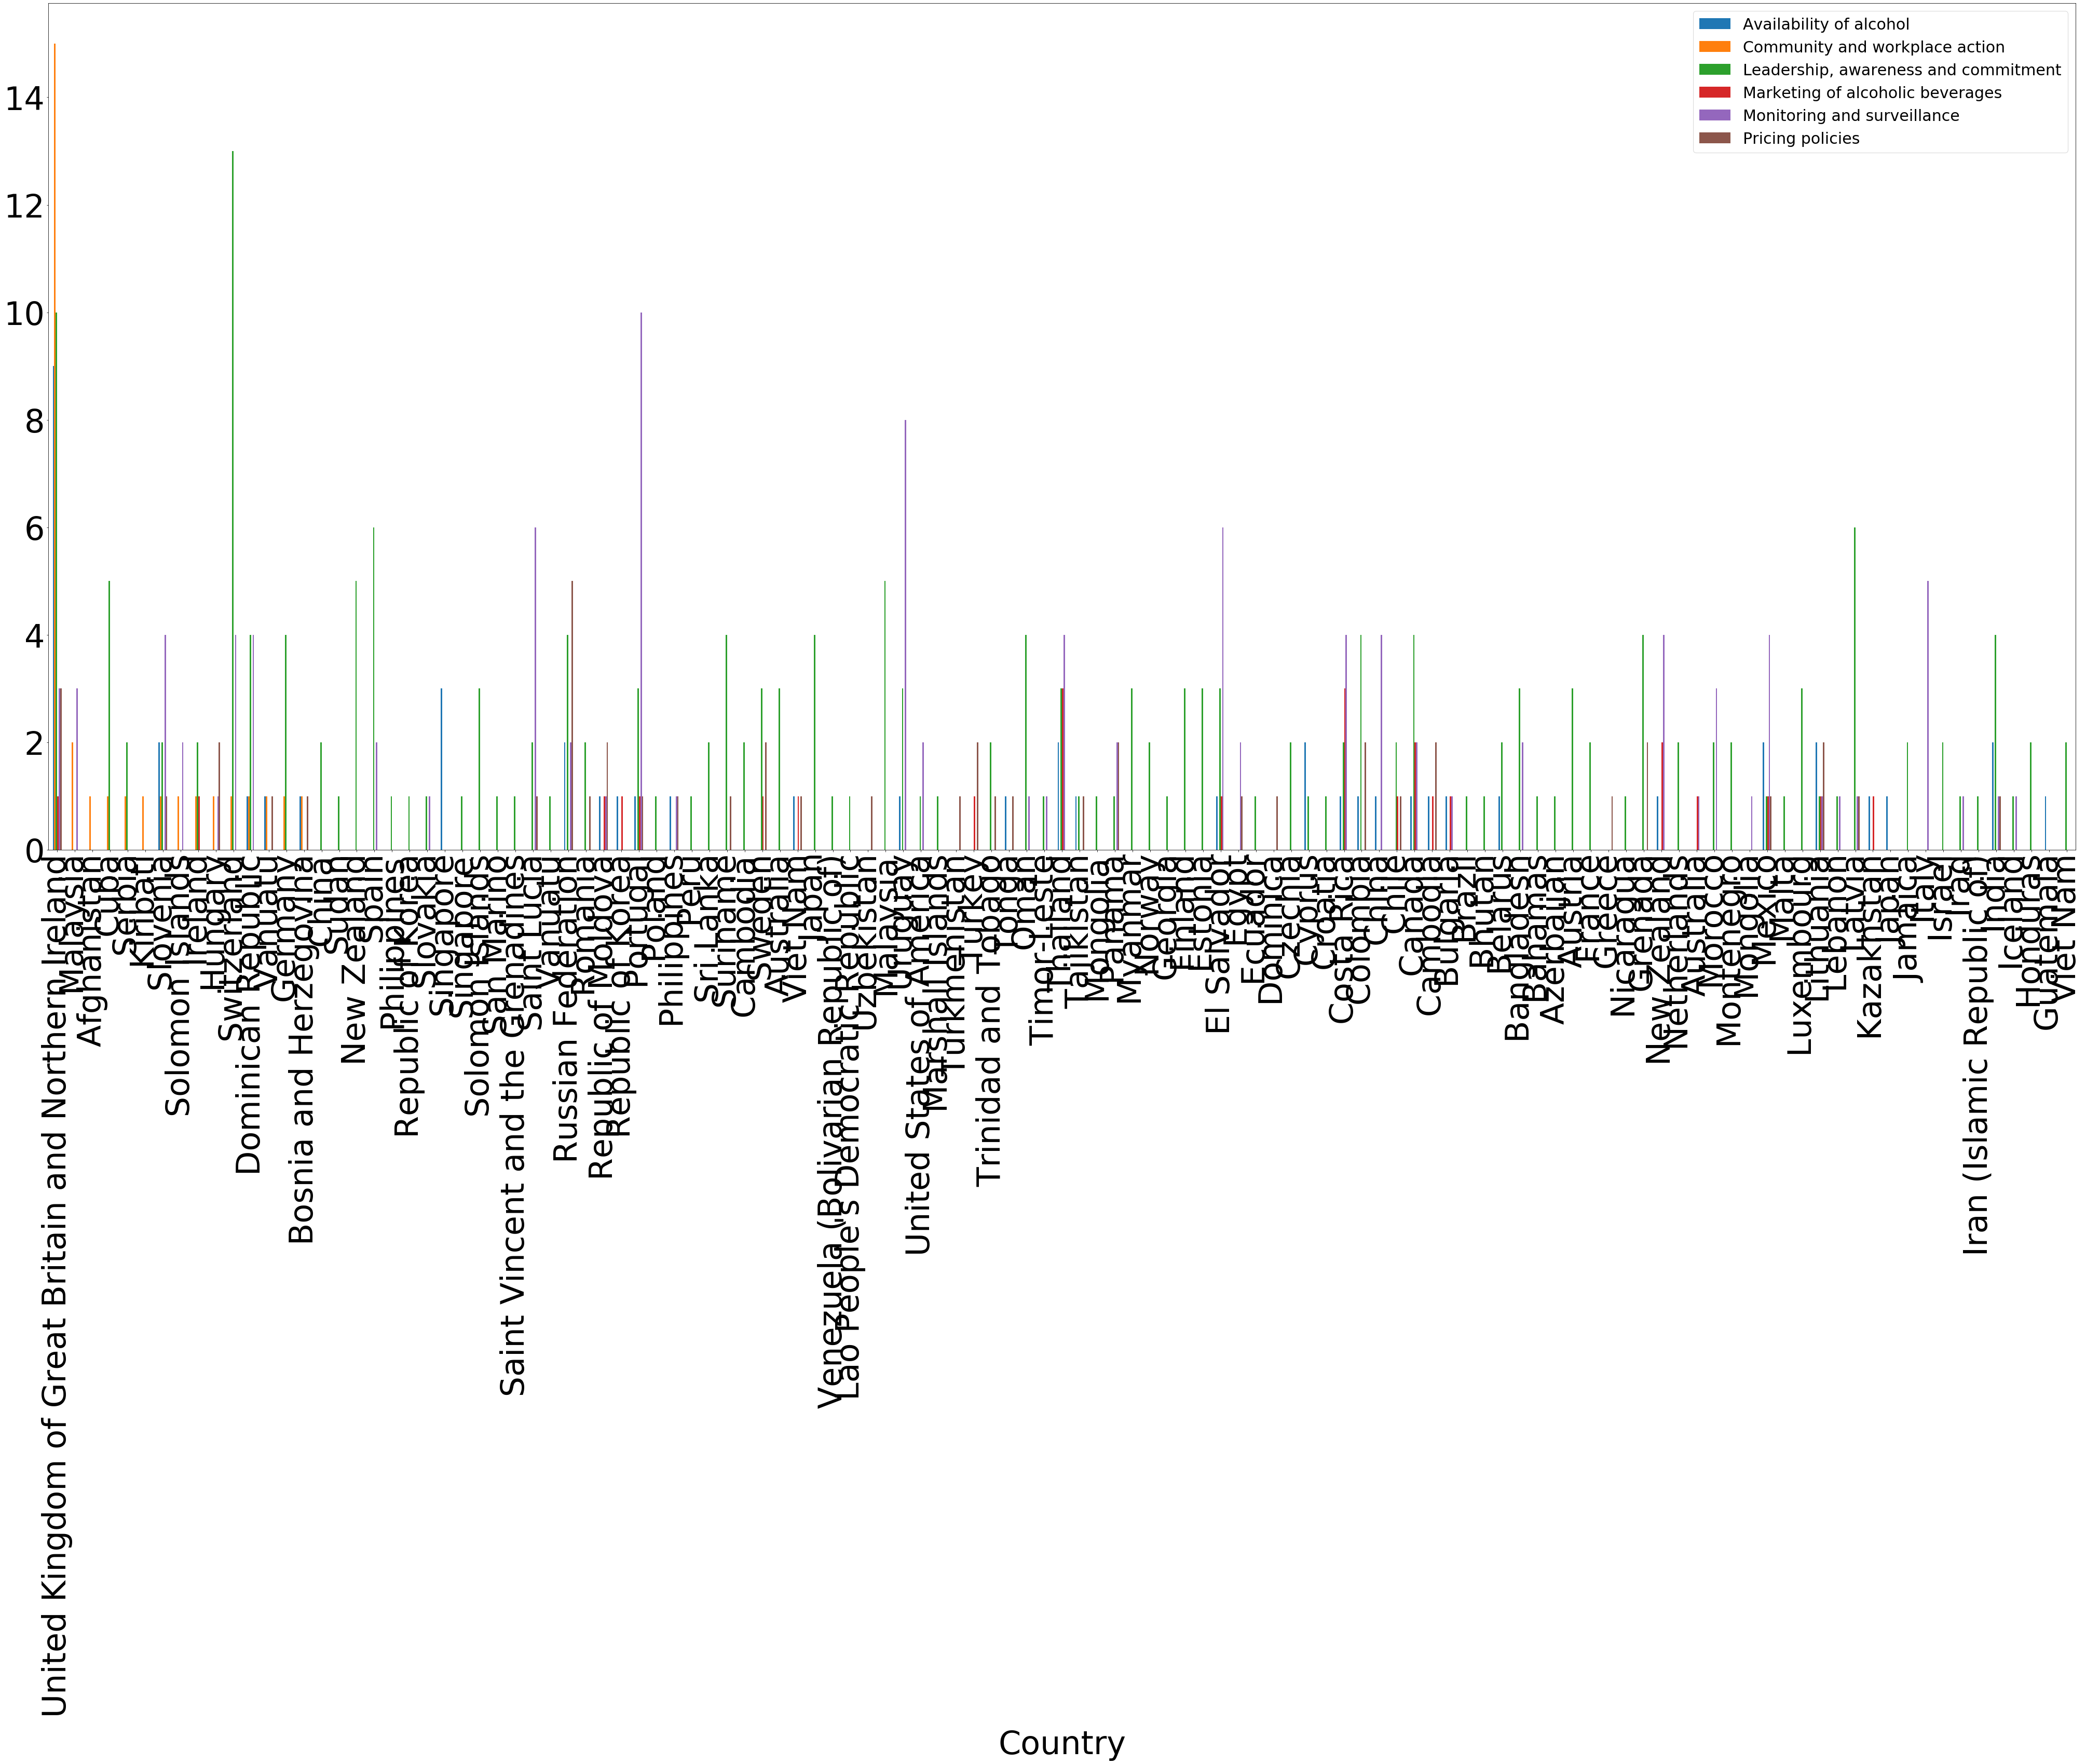

In [152]:
test = policy_by_country.sort_values('Community and workplace action', ascending=False)
test.plot.bar()
plt.rcParams["figure.figsize"] = [70,30]
plt.legend(loc=1, prop={'size': 30})
plt.rcParams.update({'font.size': 52})